In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/asthma-disease-dataset/asthma_disease_data.csv


# Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/asthma-disease-dataset/asthma_disease_data.csv')

In [4]:
df.head(10)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid
5,5039,21,0,2,0,21.812975,0,0.470044,1.759118,9.549262,...,2.328191,5.898515,1,0,1,0,0,1,0,Dr_Confid
6,5040,45,1,1,1,30.245954,1,9.371784,7.030507,5.746128,...,2.995100,1.701512,1,1,1,0,0,0,0,Dr_Confid
7,5041,26,0,0,1,26.048416,1,8.344096,1.626484,6.431179,...,2.069343,4.012260,1,0,0,1,1,1,0,Dr_Confid
8,5042,49,1,1,2,32.676204,0,2.690256,3.920034,5.843645,...,1.761242,5.190931,1,1,1,1,0,0,0,Dr_Confid
9,5043,45,1,1,1,29.910298,0,2.895720,2.607700,7.234908,...,2.848420,5.771022,1,0,0,0,1,1,0,Dr_Confid


In [5]:
df.tail()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
2387,7421,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,...,3.125249,5.166032,0,1,0,0,0,1,1,Dr_Confid
2388,7422,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,...,1.132977,5.509502,0,0,0,1,1,0,1,Dr_Confid
2389,7423,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,...,1.685962,3.346877,1,0,1,1,0,1,1,Dr_Confid
2390,7424,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,...,3.481549,1.713274,0,1,1,0,1,1,0,Dr_Confid
2391,7425,26,1,0,0,28.123021,1,1.613138,7.412878,8.512253,...,2.280613,2.453284,1,1,0,0,1,0,0,Dr_Confid


In [6]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'PollutionExposure', 'PollenExposure', 'DustExposure', 'PetAllergy',
       'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever',
       'GastroesophagealReflux', 'LungFunctionFEV1', 'LungFunctionFVC',
       'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing',
       'NighttimeSymptoms', 'ExerciseInduced', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [7]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,...,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,6229.500000,42.137960,0.493311,0.669732,1.307274,27.244877,0.141722,5.051786,5.022867,7.019012,...,0.158027,2.548564,3.741270,0.596154,0.500418,0.503344,0.503344,0.602425,0.604933,0.051839
std,690.655244,21.606655,0.500060,0.986120,0.898242,7.201628,0.348838,2.903574,2.909980,1.732475,...,0.364842,0.861809,1.303689,0.490770,0.500104,0.500093,0.500093,0.489499,0.488967,0.221749
min,5034.000000,5.000000,0.000000,0.000000,0.000000,15.031803,0.000000,0.001740,0.003031,4.001437,...,0.000000,1.000459,1.500045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5631.750000,23.000000,0.000000,0.000000,1.000000,20.968313,0.000000,2.578333,2.432043,5.498500,...,0.000000,1.824113,2.607489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6229.500000,42.000000,0.000000,0.000000,1.000000,27.052202,0.000000,5.016881,5.115383,6.975839,...,0.000000,2.553244,3.734982,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,6827.250000,61.000000,1.000000,1.000000,2.000000,33.555903,0.000000,7.540234,7.544216,8.526950,...,0.000000,3.292897,4.864121,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,7425.000000,79.000000,1.000000,3.000000,3.000000,39.985611,1.000000,9.995809,9.999904,9.996235,...,1.000000,3.999719,5.999421,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [9]:
df.shape

(2392, 29)

In [10]:
df.isnull()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2388,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2389,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64

In [12]:
df[df.duplicated()]

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge


In [13]:
df.duplicated().sum()

0

In [14]:
age_diagnosed = df[df['Diagnosis'] == 1]['Age']
age_not_diagnosed = df[df['Diagnosis'] == 0]['Age']


print("Ages of diagnosed patients:")
print(age_diagnosed.values)

print("\nAges of not diagnosed patients:")
print(age_not_diagnosed.values)

Ages of diagnosed patients:
[31 45 69 49 60  5 49 32 21 48 77 42 79 61 20 58 47 70 77 32  9 26 30 67
 13 24 40 16 12 12  5  5 23 40 22 63 36 67 23 58  7 51 43 25 14 31 35 56
 49 45 62  7 41 72 63 65  7 39 18 39 16 61  6 69 17 41 39 38 36 74 19 61
 16 73  6 15 56 12 63 45 74 78 60 55 68 16 41 76 28 53 23 18 78 67 65 35
 13 25 20 37 36  5 24 78 77 26 54 58 56 35 68 27 12 70 77 25  5  9 74 65
 31 43 18 54]

Ages of not diagnosed patients:
[63 26 57 ...  5 46 26]


In [15]:
age_diagnosed = df[df['Diagnosis'] == 1]['Age']


max_age_diagnosed = age_diagnosed.max()
max_age_count_diagnosed = age_diagnosed[age_diagnosed == max_age_diagnosed].count()


print("Maximum age of diagnosed patients:", max_age_diagnosed)
print("Count of patients with maximum age:", max_age_count_diagnosed)

Maximum age of diagnosed patients: 79
Count of patients with maximum age: 1


In [16]:
age_diagnosed = df[df['Diagnosis'] == 1]['Age']
age_not_diagnosed = df[df['Diagnosis'] == 0]['Age']


mean_age_diagnosed = age_diagnosed.mean()
std_age_diagnosed = age_diagnosed.std()
mean_age_not_diagnosed = age_not_diagnosed.mean()
std_age_not_diagnosed = age_not_diagnosed.std()


print("Descriptive Statistics:")
print(f"Mean age (diagnosed): {mean_age_diagnosed:.2f} ± {std_age_diagnosed:.2f}")
print(f"Mean age (not diagnosed): {mean_age_not_diagnosed:.2f} ± {std_age_not_diagnosed:.2f}")

Descriptive Statistics:
Mean age (diagnosed): 40.74 ± 22.75
Mean age (not diagnosed): 42.21 ± 21.55


In [17]:
age_diagnosed = df[df['Diagnosis'] == 1]['Age']

# Find the maximum age and its count
max_age_diagnosed = age_diagnosed.max()
max_age_count_diagnosed = age_diagnosed[age_diagnosed == max_age_diagnosed].count()

# Print the results
print("Maximum age of diagnosed patients:", max_age_diagnosed)
print("Count of patients with maximum age:", max_age_count_diagnosed)

Maximum age of diagnosed patients: 79
Count of patients with maximum age: 1


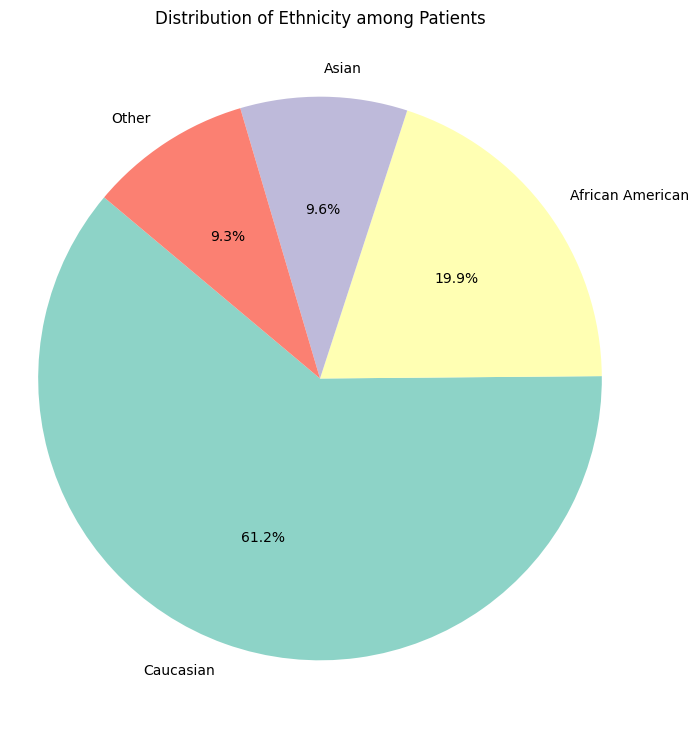

In [18]:
ethnicity_counts = df['Ethnicity'].value_counts()

ethnicity_labels = {
    0: 'Caucasian',
    1: 'African American',
    2: 'Asian',
    3: 'Other'
}

ethnicity_counts.index = ethnicity_counts.index.map(ethnicity_labels)

# Plotting a pie chart
plt.figure(figsize=(8, 9))
plt.pie(ethnicity_counts, labels=ethnicity_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Distribution of Ethnicity among Patients')
plt.axis('equal') 
plt.show()

In [19]:
ethnicity_diagnosis_counts = pd.crosstab(df['Ethnicity'], df['Diagnosis'])
ethnicity_diagnosis_percentage = ethnicity_diagnosis_counts.apply(lambda r: r/r.sum()*100, axis=1)

print("\n0: Caucasian,\n1: African American,\n2: Asian,\n3: Other")

print("\nFrequency of each ethnicity by diagnosis status:")
print(ethnicity_diagnosis_counts)

print("\nPercentage of each ethnicity by diagnosis status:")
print(ethnicity_diagnosis_percentage)


0: Caucasian,
1: African American,
2: Asian,
3: Other

Frequency of each ethnicity by diagnosis status:
Diagnosis     0   1
Ethnicity          
0          1392  73
1           450  25
2           218  11
3           208  15

Percentage of each ethnicity by diagnosis status:
Diagnosis          0         1
Ethnicity                     
0          95.017065  4.982935
1          94.736842  5.263158
2          95.196507  4.803493
3          93.273543  6.726457


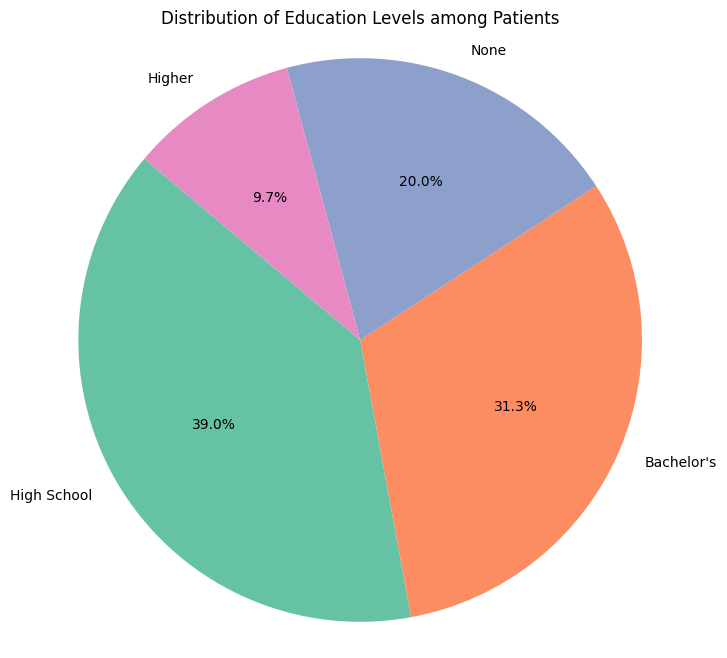

In [20]:
education_counts = df['EducationLevel'].value_counts()


education_labels = {
    0: 'None',
    1: 'High School',
    2: "Bachelor's",
    3: 'Higher'
}


education_counts.index = education_counts.index.map(education_labels)

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors)
plt.title('Distribution of Education Levels among Patients')
plt.axis('equal')  
plt.show()

In [21]:
EducationLevel_diagnosis_counts = pd.crosstab(df['EducationLevel'], df['Diagnosis'])
EducationLevel_diagnosis_percentage = EducationLevel_diagnosis_counts.apply(lambda r: r/r.sum()*100, axis=1)

print("\n0: None,\n1: High School,\n2: Bachelor's,\n3: Higher")

print("\nFrequency of each EducationLevel by diagnosis status:")
print(EducationLevel_diagnosis_counts)

print("\nPercentage of each EducationLevel by diagnosis status:")
print(EducationLevel_diagnosis_percentage)


0: None,
1: High School,
2: Bachelor's,
3: Higher

Frequency of each EducationLevel by diagnosis status:
Diagnosis         0   1
EducationLevel         
0               453  25
1               882  51
2               720  29
3               213  19

Percentage of each EducationLevel by diagnosis status:
Diagnosis               0         1
EducationLevel                     
0               94.769874  5.230126
1               94.533762  5.466238
2               96.128171  3.871829
3               91.810345  8.189655



0: Caucasian,
1: African American,
2: Asian,
3: Other


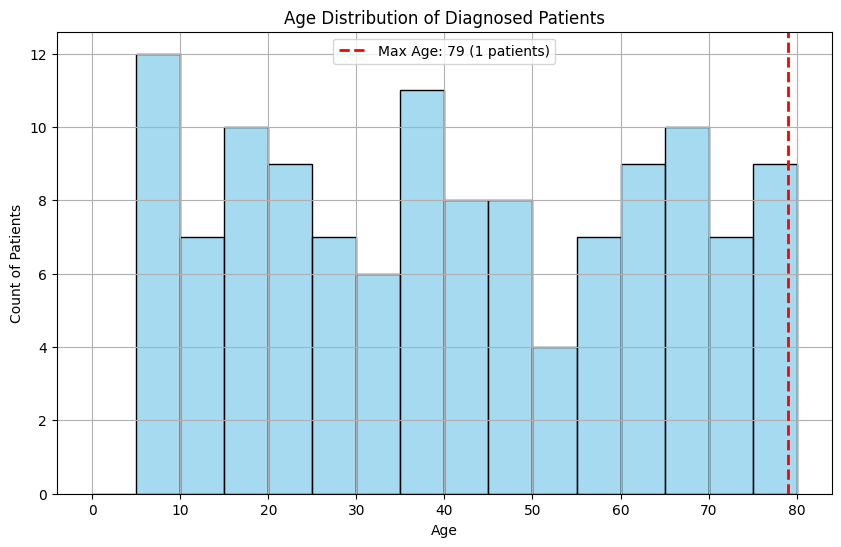

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(age_diagnosed, bins=range(0, 85, 5), kde=False, color='skyblue')
plt.axvline(max_age_diagnosed, color='red', linestyle='--', linewidth=2, label=f'Max Age: {max_age_diagnosed} ({max_age_count_diagnosed} patients)')
plt.title('Age Distribution of Diagnosed Patients')
plt.xlabel('Age')
plt.ylabel('Count of Patients')
plt.legend()
plt.grid(True)

print("\n0: Caucasian,\n1: African American,\n2: Asian,\n3: Other")

<Figure size 1000x600 with 0 Axes>

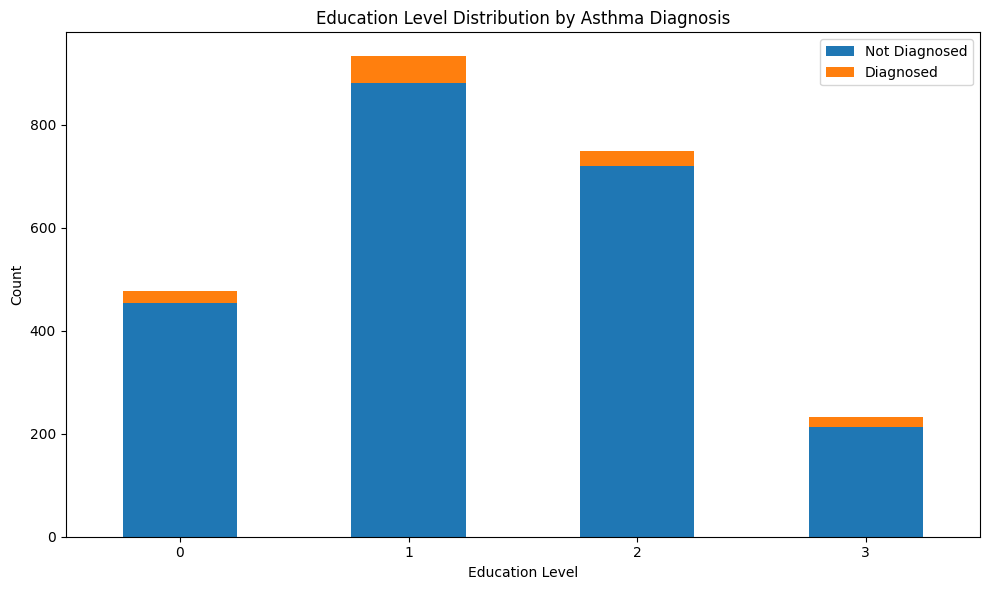


0: None,
1: High School,
2: Bachelor's,
3: Higher


In [23]:
plt.figure(figsize=(10, 6))


EducationLevel_diagnosis_counts.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Education Level Distribution by Asthma Diagnosis')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Not Diagnosed', 'Diagnosed'])

plt.tight_layout()
plt.show()

print("\n0: None,\n1: High School,\n2: Bachelor's,\n3: Higher")

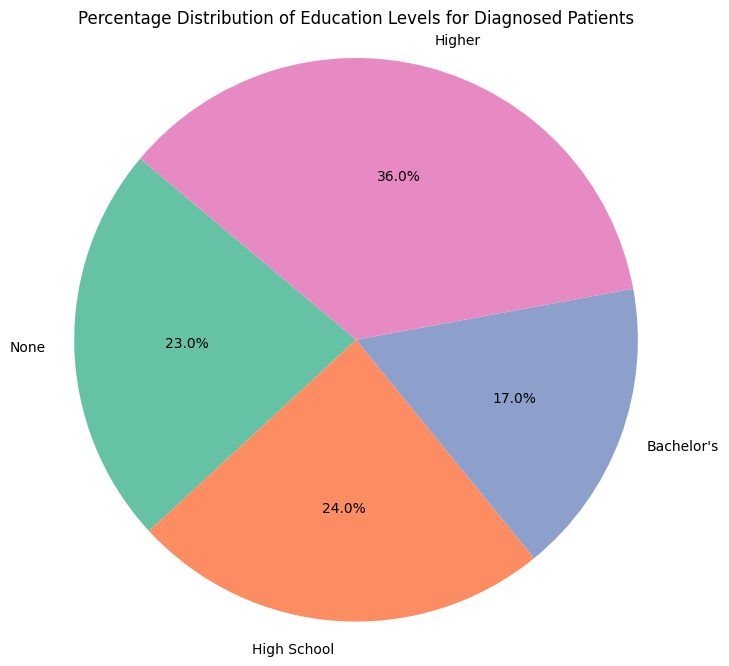

In [24]:
plt.figure(figsize=(8, 8))

# Specific labels for education levels
labels = ['None', 'High School', "Bachelor's", 'Higher']
sizes = EducationLevel_diagnosis_percentage.loc[:, 1]  # Percentage for 'Diagnosed' category

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors)
plt.title('Percentage Distribution of Education Levels for Diagnosed Patients')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()